TESTING TWEET = text
Related SENTIMENT = neutral

TESTING TWEET = rt at_user at_user at_user at_user at_user at_user choice was with pak army to either fight against india...
Related SENTIMENT = neutral

TESTING TWEET = rt at_user assasination by poisonin of maulana shows an intense combustion involving core hothead jehaadis
Related SENTIMENT = neutral

TESTING TWEET = rt at_user the only one who praised barkha for her journalism is dead now. ab kaun compliments dega? masoodazhardead
Related SENTIMENT = neutral

TESTING TWEET = rt at_user now connect the dots azhar
Related SENTIMENT = neutral

TESTING TWEET = rt at_user press release from jannat masoodazhar enjoying with hoors. masoodazhardead url
Related SENTIMENT = neutral

TESTING TWEET = rt at_user at_user at_user at_user at_user at_user at_user at_user at_user my sources with at_user at_user
Related SENTIMENT = neutral

TESTING TWEET = rt at_user did masood azhar die in the iaf strike on balakot? is the pakistan establishment work

TESTING TWEET = rt at_user jaishekejriwal is right.... hes very much like a ""mooh-bola"" son of masoodazhardead considering he provides so much propag...
Related SENTIMENT = neutral

TESTING TWEET = at_user at_user sir masoodazhardead . this one is a camouflage. how could a foreign minister's ton... url
Related SENTIMENT = neutral

TESTING TWEET = pakistan is making plot to declare masoodazhardead. they also make a fake yt channel 1 hour ago and started postin... url
Related SENTIMENT = neutral

TESTING TWEET = rt at_user can crow eater at_user or isis poop swimmer at_user at_user confirm or take interview of masoodazhardead ? at_user
Related SENTIMENT = neutral

TESTING TWEET = rt at_user jaishekejriwal is right.... hes very much like a ""mooh-bola"" son of masoodazhardead considering he provides so much propag...
Related SENTIMENT = neutral

TESTING TWEET = rt at_user did masood azhar die in the iaf strike on balakot? is the pakistan establishment working towards the 'soft landing..

TESTING TWEET = rt at_user jaishekejriwal is right.... hes very much like a ""mooh-bola"" son of masoodazhardead considering he provides so much propag...
Related SENTIMENT = neutral

TESTING TWEET = rt at_user jaishekejriwal is right.... hes very much like a ""mooh-bola"" son of masoodazhardead considering he provides so much propag...
Related SENTIMENT = neutral

TESTING TWEET = rt at_user jaishekejriwal is right.... hes very much like a ""mooh-bola"" son of masoodazhardead considering he provides so much propag...
Related SENTIMENT = neutral

TESTING TWEET = rt at_user jaishekejriwal is right.... hes very much like a ""mooh-bola"" son of masoodazhardead considering he provides so much propag...
Related SENTIMENT = neutral

TESTING TWEET = rt at_user jaishekejriwal is right.... hes very much like a ""mooh-bola"" son of masoodazhardead considering he provides so much propag...
Related SENTIMENT = neutral

TESTING TWEET = did extreme fear or did the pakis killed him ?? masoodazhardead


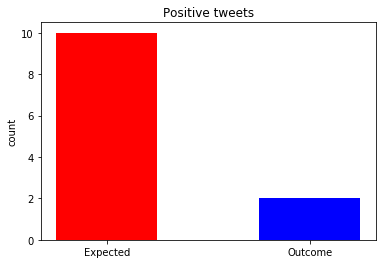

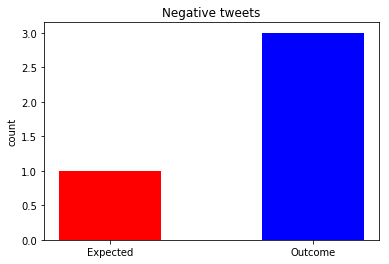

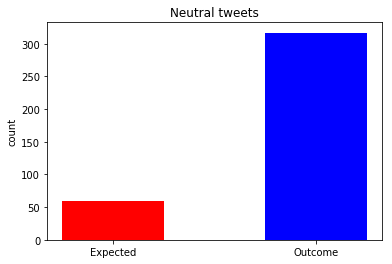

In [3]:
import re
#csv file reader
import csv
#to classinfy tweets by using ML algorithms
import nltk.classify
#importing SVM from Sklearn
from sklearn.svm import LinearSVC
#to plot the graghs, charts in python
from matplotlib import pyplot as plt

#storing results to plot graph
eresult=['neutral','neutral','neutral','neutral','neutral',
         'positive','neutral','neutral','positive','neutral',
         'neutral','neutral','neutral','neutral','positive',
         'positive','neutral','positive','neutral','neutral',
         'neutral','negative','neutral','neutral','neutral',
         'neutral','neutral','neutral','neutral','neutral',
         'neutral','neutral','neutral','neutral','neutral',
         'neutral','neutral','neutral','neutral','neutral',
         'neutral','neutral','neutral','neutral','neutral',
         'neutral','neutral','neutral','neutral','neutral',
         'neutral','neutral','positive','neutral','neutral',
         'neutral','neutral','neutral','neutral','positive',
         'positive','neutral','positive','neutral','neutral',
         'positive','neutral','neutral','neutral','neutral']
result=[]
count=0
tcount=0
accuracy=0
epcount=0
pcount=0
encount=0
ncount=0
entcount=0
ntcount=0

#start replaceTwoOrMore
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL) 
    return pattern.sub(r"\1\1", s)
#end

#start process_tweet
def processTweet(tweet):
    # process the tweets
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)    
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet 
#end 

#start getStopWordList
def getStopWordList(stopWordListFileName):
    #read the stopwords
    stopWords = []
    stopWords.append('AT_USER')
    stopWords.append('URL')

    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords
#end

#start getfeatureVector
def getFeatureVector(tweet, stopWords):
    featureVector = []  
    words = tweet.split()
    for w in words:
        #replace two or more with two occurrences 
        w = replaceTwoOrMore(w) 
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if it consists of only words
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*[a-zA-Z]+[a-zA-Z0-9]*$", w)
        #ignore if it is a stopWord
        if(w in stopWords or val is None):
            continue
        else:
            featureVector.append(w.lower())
    return featureVector    
#end

#start extract_features
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features
#end

#Read the tweets one by one and process it
inpTweets = csv.reader(open('/Users/sowmiyaaradha/Corpus_for_Tamil/Datasets/Train_Minecraft.csv', 'r',encoding='utf8'), delimiter=',',quotechar="|")
stopWords = getStopWordList('/Users/sowmiyaaradha/Corpus_for_Tamil/Datasets/stopwords.txt')
count = 0;
featureList = []
tweets = []
for row in inpTweets:
    sentiment = row[0]
    tweet = row[1]
    #print(tweet)
    processedTweet = processTweet(tweet)
    #print(processedTweet)
    featureVector = getFeatureVector(processedTweet, stopWords)
    #print(featureVector)
    featureList.extend(featureVector)
    tweets.append((featureVector, sentiment))
    #print(tweets)
    
#end loop

# Remove featureList duplicates
featureList = list(set(featureList))
#print(featureList)

# Generate the training set
training_set = nltk.classify.util.apply_features(extract_features, tweets)

# Train the Support Vector Machine(SVM) classifier
SVMclassifier = nltk.classify.SklearnClassifier(LinearSVC())
SVMclassifier.train(training_set)

# Test the SVM classifier
inputTweets = csv.reader(open('/Users/sowmiyaaradha/Corpus_for_Tamil/processed_tweets.csv', 'r',encoding='utf8'), delimiter=',',quotechar='|')
for line in inputTweets:
    testTweet=line
    processedTestTweet = processTweet(testTweet[0])
    #print(processedTestTweet)
  
    sentiment = SVMclassifier.classify(extract_features(getFeatureVector(processedTestTweet, stopWords)))
    result.append(sentiment)

    print ("TESTING TWEET = %s\nRelated SENTIMENT = %s\n" % (processedTestTweet, sentiment))


#count the length of expected result
ecount=len(eresult)
for i in range(ecount):
    #compare if expected sentiment matches with resulting sentiment
    if(result[i]==eresult[i]):
        #if matches increment the count by 1
        count=count+1
        
#calculating accuracy by using (resulting count / total expected count)*100
accuracy=(count/ecount)*100

#print the accuracy of tweets 
print("The accuracy of the algorithm is",accuracy)
#for all tweets in expected result
for i in range(len(eresult)):
    #check if expected result is positive
    if eresult[i]=='positive':
        #increment count by 1
        epcount=epcount+1
    #check if expected result is negative
    elif eresult[i]=='negative':
        #increment count by 1
        encount=encount+1
    else:
        #increment neutral count by 1
        entcount=entcount+1
#for all tweets in result(outcome)
for i in range(len(result)):
    #check if expected result is positive
    if result[i]=='positive':
         #increment count by 1
        pcount=pcount+1
    #check if expected result is negative
    elif result[i]=='negative':
         #increment count by 1
        ncount=ncount+1
    else:
        #increment neutral count by 1
        ntcount=ntcount+1
        
pcount1 = (pcount/count)*100
ncount1 = (ncount/count)*100
ntcount1 = (pcount/count)*100
print("Detailed Report using SVM Classifier")
print("Percentage of tweets that are Negative : "+str(ncount1)+'%')
print("Percentage of tweets that are Positive : "+str(pcount1)+'%')
print("Percentage of tweets that are Neutral : "+str(ntcount1)+'%')

left = [1, 2]
#hieght as expected positive count and resulting positive count 
height = [epcount, pcount]
#labels of bar chart
tick_label = ['Expected', 'Outcome']
#plot bar chart with 0.5 width and colored as expected positive count red and resulting positive count blue
plt.bar(left, height, tick_label = tick_label,width = 0.5, color = ['red', 'blue'])
#assign x label and y label
plt.xlabel('')
plt.ylabel('count')
#tittle of chart
plt.title('Positive tweets')
#shows the bar chart
plt.show()

#hieght as expected negative count and resulting negative count 
height = [encount, ncount]
#labels of bar chart
tick_label = ['Expected', 'Outcome']
#plot bar chart with 0.5 width and colored as expected positive count red and resulting positive count blue
plt.bar(left, height, tick_label = tick_label,width = 0.5, color = ['red', 'blue'])
#assign x label and y label
plt.xlabel('')
plt.ylabel('count')
#tittle of chart
plt.title('Negative tweets')
#shows the bar chart
plt.show()

#hieght as expected neutral count and resulting neutral count
height = [entcount, ntcount]
#labels of bar chart
tick_label = ['Expected', 'Outcome']
#plot bar chart with 0.5 width and colored as expected positive count red and resulting positive count blue
plt.bar(left, height, tick_label = tick_label,width = 0.5, color = ['red', 'blue'])
#assign x label and y label
plt.xlabel('')
plt.ylabel('count')
#tittle of chart
plt.title('Neutral tweets')
#shows the bar chart
plt.show()